#### Dataset

In [1]:
# Dataset: UpdatedResumeDataset.csv
# https://mitu.co.in/dataset

#### Import the libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Import the dataset

In [6]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [7]:
df.shape

(962, 2)

In [8]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


#### Separate the input and output data

In [10]:
x = df['Resume']
y = df['Category']

In [11]:
x.str.len()

0      4786
1      1268
2      1871
3      6995
4       452
       ... 
957    2130
958    2306
959    3319
960     767
961    1955
Name: Resume, Length: 962, dtype: int64

In [13]:
np.unique(y)

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Category'>

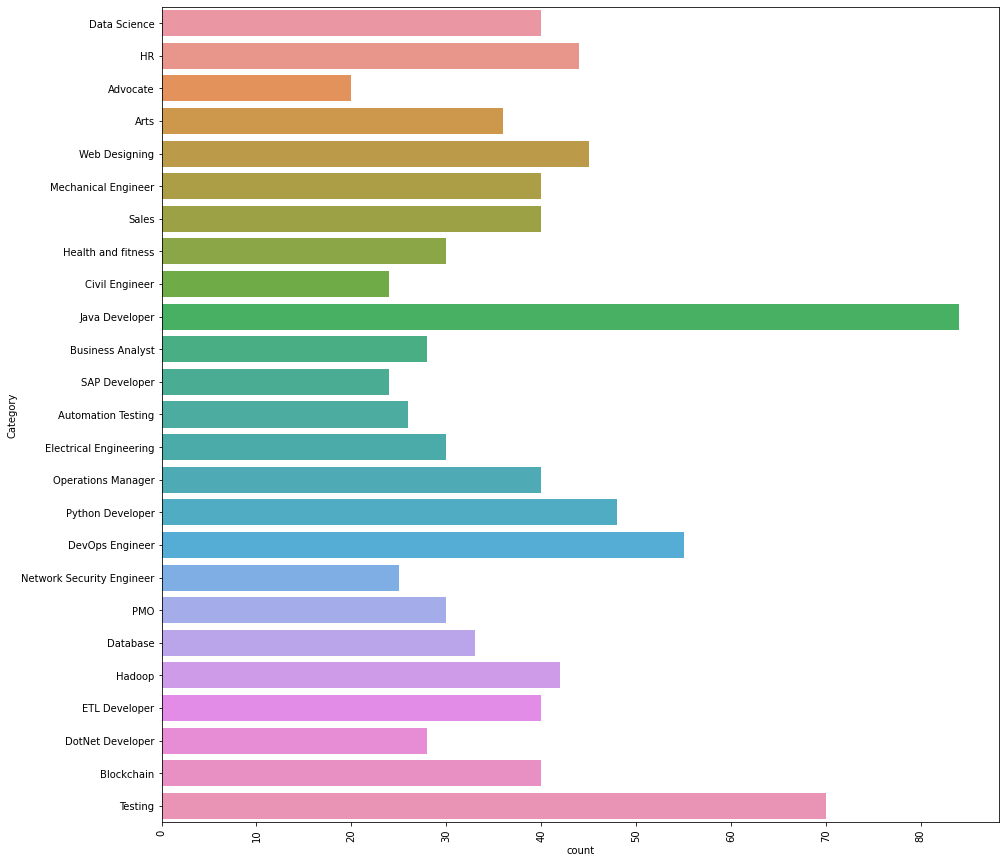

In [15]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

In [20]:
df['Category'].value_counts().index

Index(['Java Developer', 'Testing', 'DevOps Engineer', 'Python Developer',
       'Web Designing', 'HR', 'Hadoop', 'Data Science', 'ETL Developer',
       'Sales', 'Operations Manager', 'Mechanical Engineer', 'Blockchain',
       'Arts', 'Database', 'Health and fitness', 'PMO',
       'Electrical Engineering', 'DotNet Developer', 'Business Analyst',
       'Automation Testing', 'Network Security Engineer', 'Civil Engineer',
       'SAP Developer', 'Advocate'],
      dtype='object')

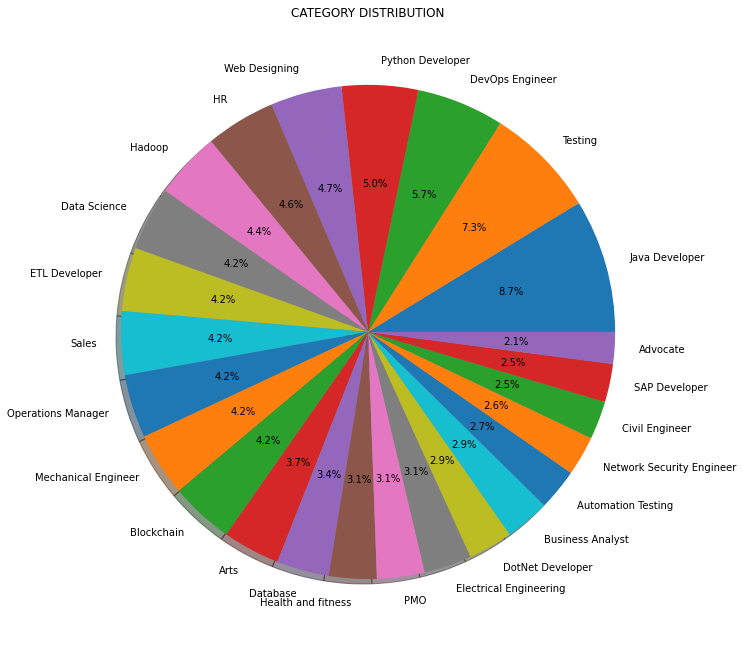

In [24]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].value_counts().index
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

plt.pie(targetCounts, labels=targetLabels, 
                     autopct='%1.1f%%', shadow=True);

In [33]:
print(x[17])

Education Details 
 B.Tech   Rayat and Bahra Institute of Engineering and Biotechnology
Data Science 

Data Science
Skill Details 
Numpy- Exprience - Less than 1 year months
Machine Learning- Exprience - Less than 1 year months
Tensorflow- Exprience - Less than 1 year months
Scikit- Exprience - Less than 1 year months
Python- Exprience - Less than 1 year months
GCP- Exprience - Less than 1 year months
Pandas- Exprience - Less than 1 year months
Neural Network- Exprience - Less than 1 year monthsCompany Details 
company - Wipro
description - Bhawana Aggarwal
E-Mail:bhawana.chd@gmail.com
Phone: 09876971076
VVersatile, high-energy professional targeting challenging assignments in Machine
PROFILE SUMMARY
âª An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine
Learning, Deep Learning, Data Science, Python, Software Development.
âª Skilled in managing end-to-end development and software products / projects from inception, requirement
specs, planning,

In [34]:
import re

In [75]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', ' ', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', ' ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',resumeText)  
    # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  
    # remove extra whitespace
    return resumeText

In [36]:
cleanResume(x[17])

'Education Details B Tech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy Exprience Less than 1 year months Machine Learning Exprience Less than 1 year months Tensorflow Exprience Less than 1 year months Scikit Exprience Less than 1 year months Python Exprience Less than 1 year months GCP Exprience Less than 1 year months Pandas Exprience Less than 1 year months Neural Network Exprience Less than 1 year monthsCompany Details company Wipro description Bhawana Aggarwal E Mail bhawana chd Phone 09876971076 VVersatile high energy professional targeting challenging assignments in Machine PROFILE SUMMARY An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine Learning Deep Learning Data Science Python Software Development Skilled in managing end to end development and software products projects from inception requirement specs planning designing implementation configuration and documentation Knowled

In [37]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [38]:
swords = stopwords.words('english')
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in swords and word not in string.punctuation:
            totalWords.append(word)

In [43]:
totalWords;

In [44]:
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


In [49]:
totalWords

['Skills',
 'Programming',
 'Languages',
 'Python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib',
 'Sql',
 'Java',
 'JavaScript',
 'JQuery',
 'Machine',
 'learning',
 'Regression',
 'SVM',
 'Na',
 'Bayes',
 'KNN',
 'Random',
 'Forest',
 'Decision',
 'Trees',
 'Boosting',
 'techniques',
 'Cluster',
 'Analysis',
 'Word',
 'Embedding',
 'Sentiment',
 'Analysis',
 'Natural',
 'Language',
 'processing',
 'Dimensionality',
 'reduction',
 'Topic',
 'Modelling',
 'LDA',
 'NMF',
 'PCA',
 'Neural',
 'Nets',
 'Database',
 'Visualizations',
 'Mysql',
 'SqlServer',
 'Cassandra',
 'Hbase',
 'ElasticSearch',
 'D3',
 'js',
 'DC',
 'js',
 'Plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'Tableau',
 'Others',
 'Regular',
 'Expression',
 'HTML',
 'CSS',
 'Angular',
 '6',
 'Logstash',
 'Kafka',
 'Python',
 'Flask',
 'Git',
 'Docker',
 'computer',
 'vision',
 'Open',
 'CV',
 'understanding',
 'Deep',
 'learning',
 'Education',
 'Details',
 'Data',
 'Science',
 'Assurance',
 'Associate',

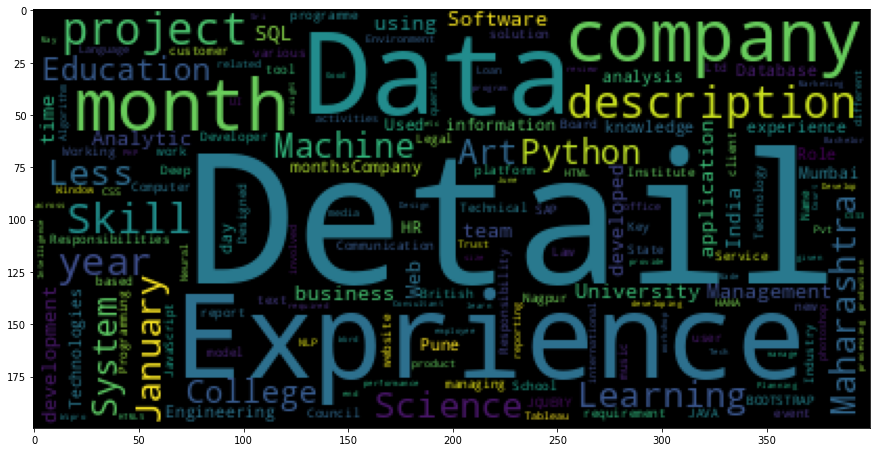

In [59]:
wc1 = WordCloud(collocations=False).generate(" ".join(totalWords))
plt.figure(figsize=(15,15))
plt.imshow(wc1)
plt.savefig('wordcloud.jpg')

In [76]:
x = df['Resume']
y = df['Category']

#### TF*IDF Vectorizer

In [77]:
cleaned = x.apply(lambda a: cleanResume(a))

In [78]:
cleaned;

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
tfidf = TfidfVectorizer(stop_words='english')

In [81]:
x_vect = tfidf.fit_transform(cleaned)

In [82]:
x_vect.shape

(962, 7351)

#### Cross Validation

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_vect, y, random_state=0)

In [84]:
x_train.shape

(721, 7351)

In [85]:
x_test.shape

(241, 7351)

#### Build the model

In [87]:
from sklearn.neighbors import NearestCentroid

In [88]:
clf = NearestCentroid()

In [89]:
clf.fit(x_train, y_train)

NearestCentroid()

In [91]:
len(clf.centroids_)

25

#### Performance Evaluation

In [93]:
y_pred = clf.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score, classification_report

In [95]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         3
       Automation Testing       0.83      0.83      0.83         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00        10
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.85      0.92        13
         DotNet Developer       1.00      1.00      1.00        10
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       0.91      1.00      0.95        10
                       HR       1.00      1.00      1.00         8
                   Hadoop       1.00      1.00      1.00     

In [99]:
f = open('Sample_resume.txt')

In [100]:
new = f.read()

In [104]:
new = tfidf.transform([new])

In [105]:
clf.predict(new)

array(['Data Science'], dtype=object)